In [2]:
%matplotlib inline
%cd ..
from src.LRGSG_package.LRGSG import *

/home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


In [3]:
ssize_list = [2**k for k in range(4, 7)]
nrep = [64, 64, 64]#[2**(15-k) for k in range(4, 8)]
nrep_range = [range(nr) for nr in nrep]
pval_list = [0.01, 0.05, 0.09, 0.098, 0.099, 0.100, 0.101, 0.102, 0.104, 0.15, 0.2, 0.3]
print('list of sizes', ssize_list, '\nlist of flip probs', pval_list, '\nlist of replicas', nrep)

list of sizes [16, 32, 64] 
list of flip probs [0.01, 0.05, 0.09, 0.098, 0.099, 0.1, 0.101, 0.102, 0.104, 0.15, 0.2, 0.3] 
list of replicas [64, 64, 64]


In [68]:
d_lmin = []

for i,L in enumerate(ssize_list):
    nedges = 2*L**2
    path = f"data/tmp/N={L*L}_navg={nrep[i]}/"
    if not os.path.isdir(path):
        os.makedirs(path)
    
    for p in pval_list:
        lmin = []
        wlist = []
        savename = f"{path}p={p:.3g}.txt"
        savename2 = f"{path}w_p={p:.3g}.txt"
        if os.path.exists(savename) and os.path.exists(savename2):
            continue
        for nr in tqdm(nrep_range[i], desc=f"replicas for L={L}, p={p}"):
            G = nx.grid_2d_graph(L, L, periodic=True)
            ransample = random.sample(range(nedges), int(p*nedges))
            #
            all_weights = {e: 1 for e in G.edges()}
            neg_weights = {e: -1 for i,e in enumerate(G.edges()) if i in ransample}
            #
            nx.set_edge_attributes(G, values=all_weights, name='weight')
            nx.set_edge_attributes(G, values=neg_weights, name='weight')
            slapl, w = get_graph_lspectrum(G, is_signed=True)
            sorted_indexes = np.argsort(w)
            w = w[sorted_indexes]
            lmin_tmp = [np.real(w[0]), np.real(w[1])]
            lmin.append(lmin_tmp)
        lminarr = np.array(lmin)
        d_lmin.append({'L': L, 'p':p, 'lmin': lminarr})
        np.savetxt(savename, np.array(lminarr))

replicas for L=32, p=0.05:  11%|█         | 7/64 [00:05<00:46,  1.23it/s]


KeyboardInterrupt: 

In [3]:
for dd in d_lmin:
    path = f"data/tmp/N={dd['L']*dd['L']}_navg={len(dd['lmin'])}/"
    savename = f"{path}p={dd['p']:.3g}.txt"
    print(savename)
    if not os.path.isdir(path):
        os.makedirs(path)
    print(os.getcwd())
    np.savetxt(savename,np.real(dd['lmin']))

NameError: name 'd_lmin' is not defined

4.000000000000005

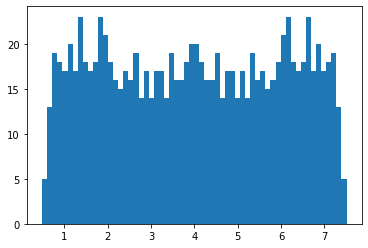

In [66]:
L = 32
nedges= 2*L*L 
p = 0.33
G = nx.grid_2d_graph(L, L, periodic=True)
ransample = random.sample(range(nedges), int(p*nedges))
#
all_weights = {e: 1 for e in G.edges()}
neg_weights = {e: -1 for i,e in enumerate(G.edges()) if i in ransample}
#
nx.set_edge_attributes(G, values=all_weights, name='weight')
nx.set_edge_attributes(G, values=neg_weights, name='weight')
slapl, w = get_graph_lspectrum(G, is_signed=True)
plt.hist(w, bins=60)
np.mean(w)
# plt.xscale('log')
# plt.yscale('log')

In [ ]:
L = 16
nedges = 2*L**2
navg = 2048
#1 - <x4>/3<x^2>^2

In [ ]:
plt.figure(figsize=(10, 7))
for p in pval_list[1::2]:
    path = f"data/tmp/N={L*L}_navg={navg}/"
    lminarr = np.loadtxt(f"{path}p={p:.3g}.txt")
    plt.hist(lminarr, alpha=0.4, bins=30, label=fr"$p={p}, \langle\lambda_\min\rangle = {np.mean(lminarr):.3g}, \sigma^2_{{\lambda_\min}} = {np.std(lminarr):.3g}$", histtype= "stepfilled")
    plt.hist(lminarr, bins=30, facecolor="None", edgecolor='black', histtype= "stepfilled")
    
plt.ylabel(r'$P(\langle\lambda_\min\rangle$)')
plt.xlabel(r'$\langle\lambda_\min\rangle$')
plt.legend()
# plt.yscale('log')

vedi articolo frustration
and ground-state
degeneracy in spin glasses
Scott Kirkpatrick

In [4]:
ssize_list = [2**k for k in range(4, 7)]
nrep = [64, 64, 64]#[2**(15-k) for k in range(4, 8)]
nrep_range = [range(nr) for nr in nrep]
pval_list = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 0.6, 0.7]
print('list of sizes', ssize_list, '\nlist of flip probs', pval_list, '\nlist of replicas', nrep)

list of sizes [16, 32, 64] 
list of flip probs [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 0.6, 0.7] 
list of replicas [64, 64, 64]


In [6]:
d_lmin = []

for i,L in enumerate(ssize_list):
    nedges = 2*L**2
    path = f"data/tmp/N={L*L}_navg={nrep[i]}/"
    if not os.path.isdir(path):
        os.makedirs(path)
    
    for p in pval_list:
        lmin = []
        wlist = []
        savename = f"{path}p={p:.3g}.txt"
        savename2 = f"{path}w_p={p:.3g}.txt"
        if os.path.exists(savename):
            continue
        for nr in tqdm(nrep_range[i], desc=f"replicas for L={L}, p={p}"):
            G = nx.grid_2d_graph(L, L, periodic=True)
            ransample = random.sample(range(nedges), int(p*nedges))
            #
            all_weights = {e: 1 for e in G.edges()}
            neg_weights = {e: -1 for i,e in enumerate(G.edges()) if i in ransample}
            #
            nx.set_edge_attributes(G, values=all_weights, name='weight')
            nx.set_edge_attributes(G, values=neg_weights, name='weight')
            slapl, w = get_graph_lspectrum(G, is_signed=True)
            sorted_indexes = np.argsort(w)
            w = w[sorted_indexes]
            lmin_tmp = [np.real(w[0]), np.real(w[1])]
            lmin.append(lmin_tmp)
        lminarr = np.array(lmin)
        d_lmin.append({'L': L, 'p':p, 'lmin': lminarr})
        np.savetxt(savename, np.array(lminarr))

replicas for L=64, p=0.7: 100%|██████████| 64/64 [32:09<00:00, 30.15s/it]


In [3]:
pval_list = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 0.6, 0.7]

In [1]:
plt.figure(figsize=(10, 7))

for L in [16, 32, 64]:
    lmin_avg = []
    for p in pval_list:
        path = f"data/tmp/N={L*L}_navg={64}/"
        lminarr = np.loadtxt(f"{path}p={p:.3g}.txt")
        lmin_avg.append([p, 
                         np.mean(lminarr), 
                         np.std(lminarr)])#BINDER CUMULANT: 1 - np.sum(lminarr**4)/(3*np.sum(lminarr**2)**2)
    lmin_avg = np.array(lmin_avg)
    plt.plot(lmin_avg[:,0],lmin_avg[:, 1], 'o-')
    plt.plot(lmin_avg[:,0],lmin_avg[:, 2], 'o-')
plt.xlabel(r'$p$')
plt.ylabel(r'$\langle\lambda_\min\rangle$')

NameError: name 'plt' is not defined

In [ ]:
L = 16
nrep = [range(2**(17-2*k)) for k in range(4, 8)]
p = 0.1
nedges = 2*L**2
lmin = []
for nr in tqdm(nrep[0]):
    G = nx.grid_2d_graph(L, L, periodic=True)
    ransample = random.sample(range(nedges), int(p*nedges))
    #
    all_weights = {e: 1 for e in G.edges()}
    neg_weights = {e: -1 for i,e in enumerate(G.edges()) if i in ransample}
    #
    nx.set_edge_attributes(G, values=all_weights, name='weight')
    nx.set_edge_attributes(G, values=neg_weights, name='weight')
    slapl = slaplacian_matrix(G).asfptype()
    try:
        lmin_tmp, _ = eigsh(slapl, k=1, which='SM', tol=1e-10)
    except ArpackNoConvergence:
        pass
    lmin.append(lmin_tmp)

In [ ]:
plt.hist(np.array(lmin).flatten(), bins=20)
plt.yscale('log')

In [ ]:
colors = ['r' if G[u][v]['weight'] == -1 else 'k' for u, v in G.edges()]
plt.figure(figsize=(10, 10))
pos = {(x,y):(y,-x) for x,y in G.nodes()}
nx.draw(G, edge_color=colors, pos=pos, node_size=10, width=5)

# JUNK

In [ ]:
# L = 16
# nedges = 2*L**2
# navg = 128
# p=0.09
# G = nx.grid_2d_graph(L, L, periodic=True)
# ransample = random.sample(range(nedges), int(p*nedges))
# #
# all_weights = {e: 1 for e in G.edges()}
# neg_weights = {e: -1 for i,e in enumerate(G.edges()) if i in ransample}
# #
# nx.set_edge_attributes(G, values=all_weights, name='weight')
# nx.set_edge_attributes(G, values=neg_weights, name='weight')
# slapl, w = get_graph_lspectrum(G, is_signed=True)

In [ ]:
L = 4
G = nx.grid_2d_graph(L, L, periodic=True)
L1 = slaplacian_matrix(G)
L2 = nx.laplacian_matrix(G)
L1.asfptype() - L2.asfptype()

In [ ]:
ransample = random.sample(range(2*L*L), 2*L*L)
neg_weights = {e: -1 for i,e in enumerate(G.edges()) if i in ransample}
nx.set_edge_attributes(G, values=neg_weights, name='weight')
L1 = slaplacian_matrix(G)
L2 = nx.laplacian_matrix(G)
L1.asfptype() - L2.asfptype()

In [1]:
1000*100*8

800000